# Assignment

Decision Tree

About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,make_scorer,f1_score
from sklearn.model_selection import GridSearchCV,cross_val_score, train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree


In [3]:
company_data = pd.read_csv("Company_Data.csv")
company_data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [4]:
company_data.shape

(400, 11)

In [5]:
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
company_data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [8]:
#lets see how many categories are there in ShelveLoc
print("no of Types :",len(company_data['ShelveLoc'].unique()))
print("Frequency of ShelveLoc category")
company_data['ShelveLoc'].value_counts()

no of Types : 3
Frequency of ShelveLoc category


Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

<AxesSubplot: xlabel='ShelveLoc', ylabel='count'>

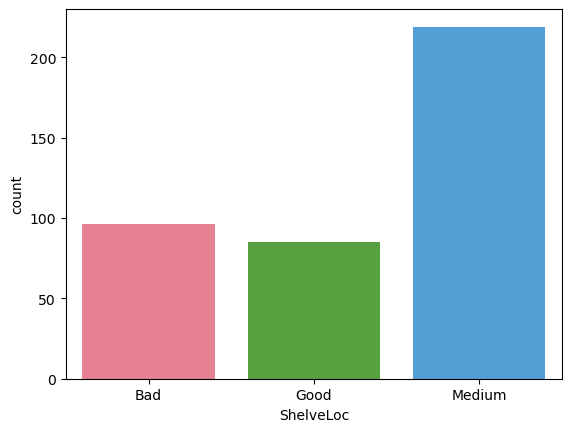

In [9]:
sns.countplot(x="ShelveLoc", data=company_data,palette="husl")

<AxesSubplot: xlabel='Urban', ylabel='count'>

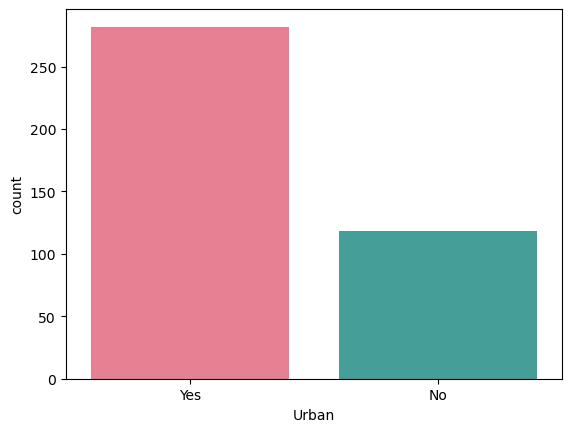

In [10]:
sns.countplot(x="Urban", data=company_data,palette="husl")

<AxesSubplot: xlabel='US', ylabel='count'>

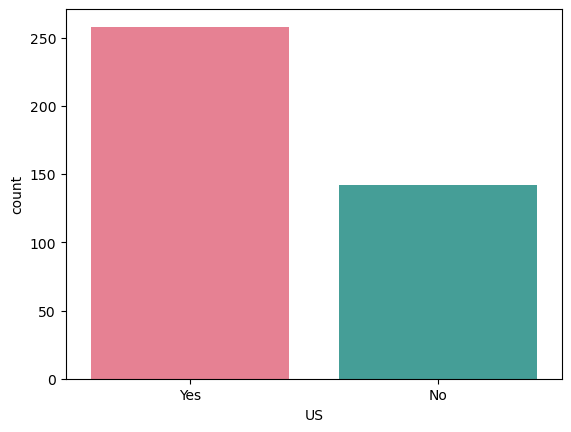

In [11]:
sns.countplot(x="US", data=company_data,palette="husl")

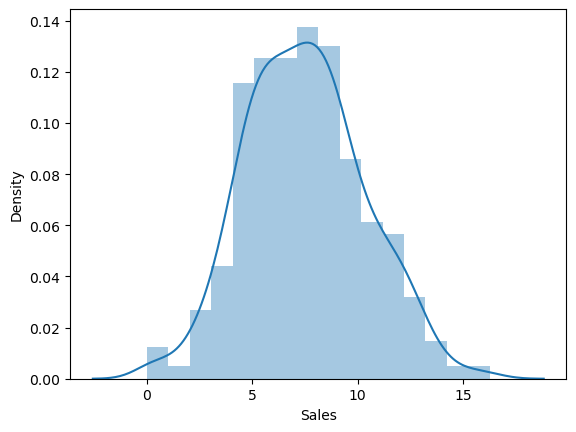

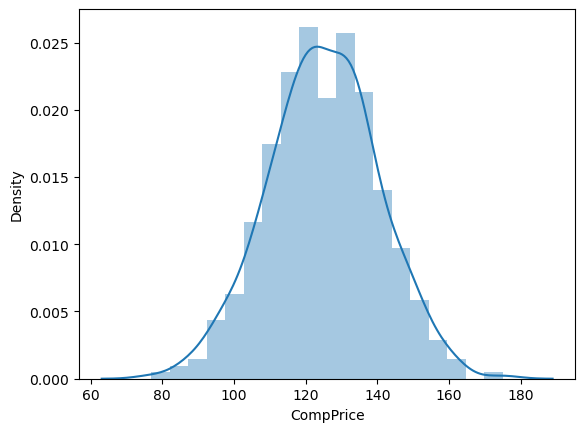

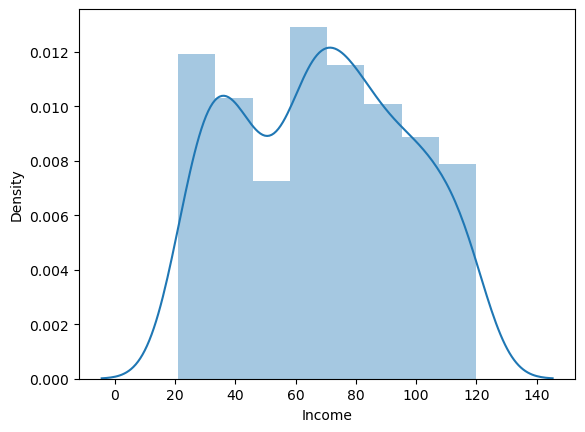

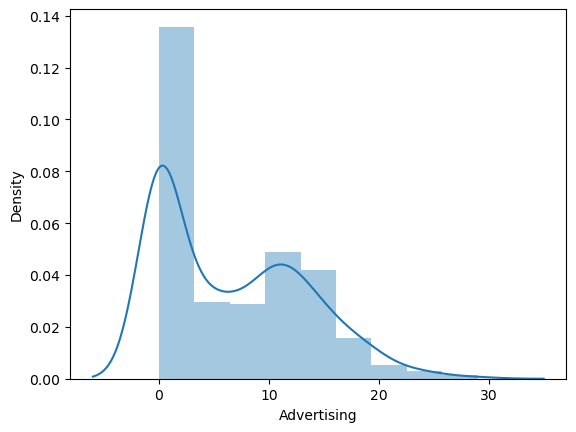

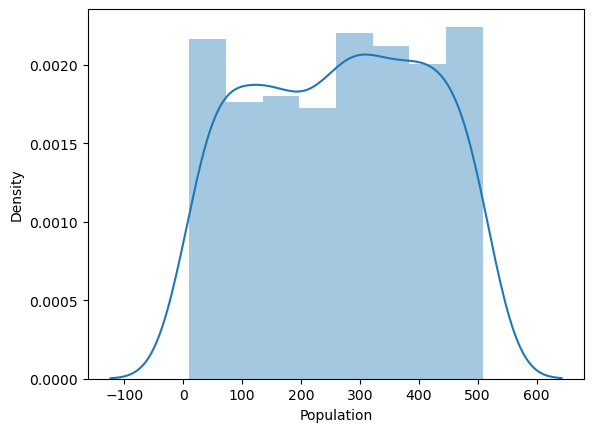

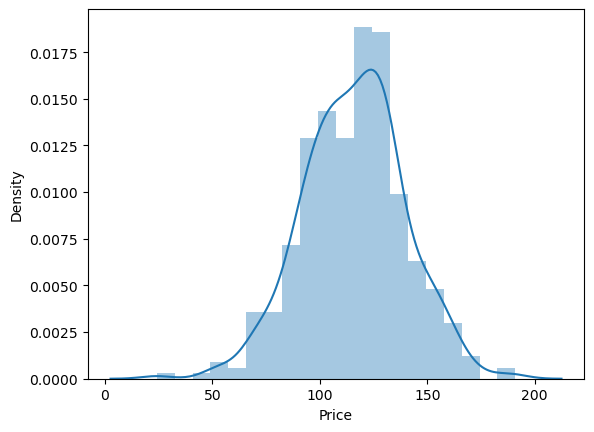

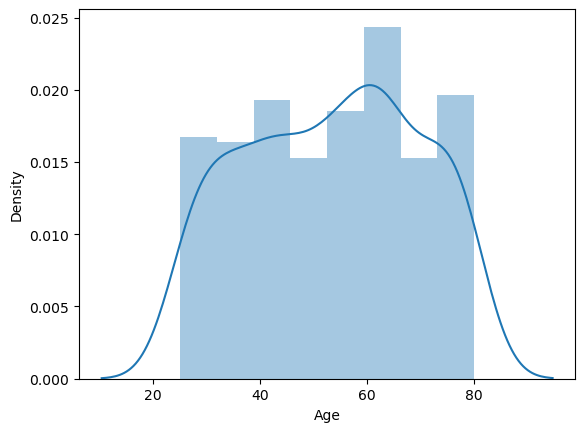

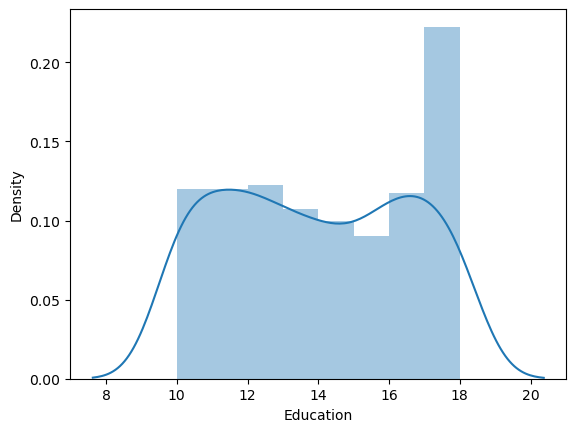

In [12]:
#Distribution for numerical features
numerical_features = [fe for fe in company_data.columns if company_data[fe].dtype!='O']
for fe in numerical_features:
    sns.distplot(company_data[fe])
    plt.show()

In [13]:
company_data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

<AxesSubplot: >

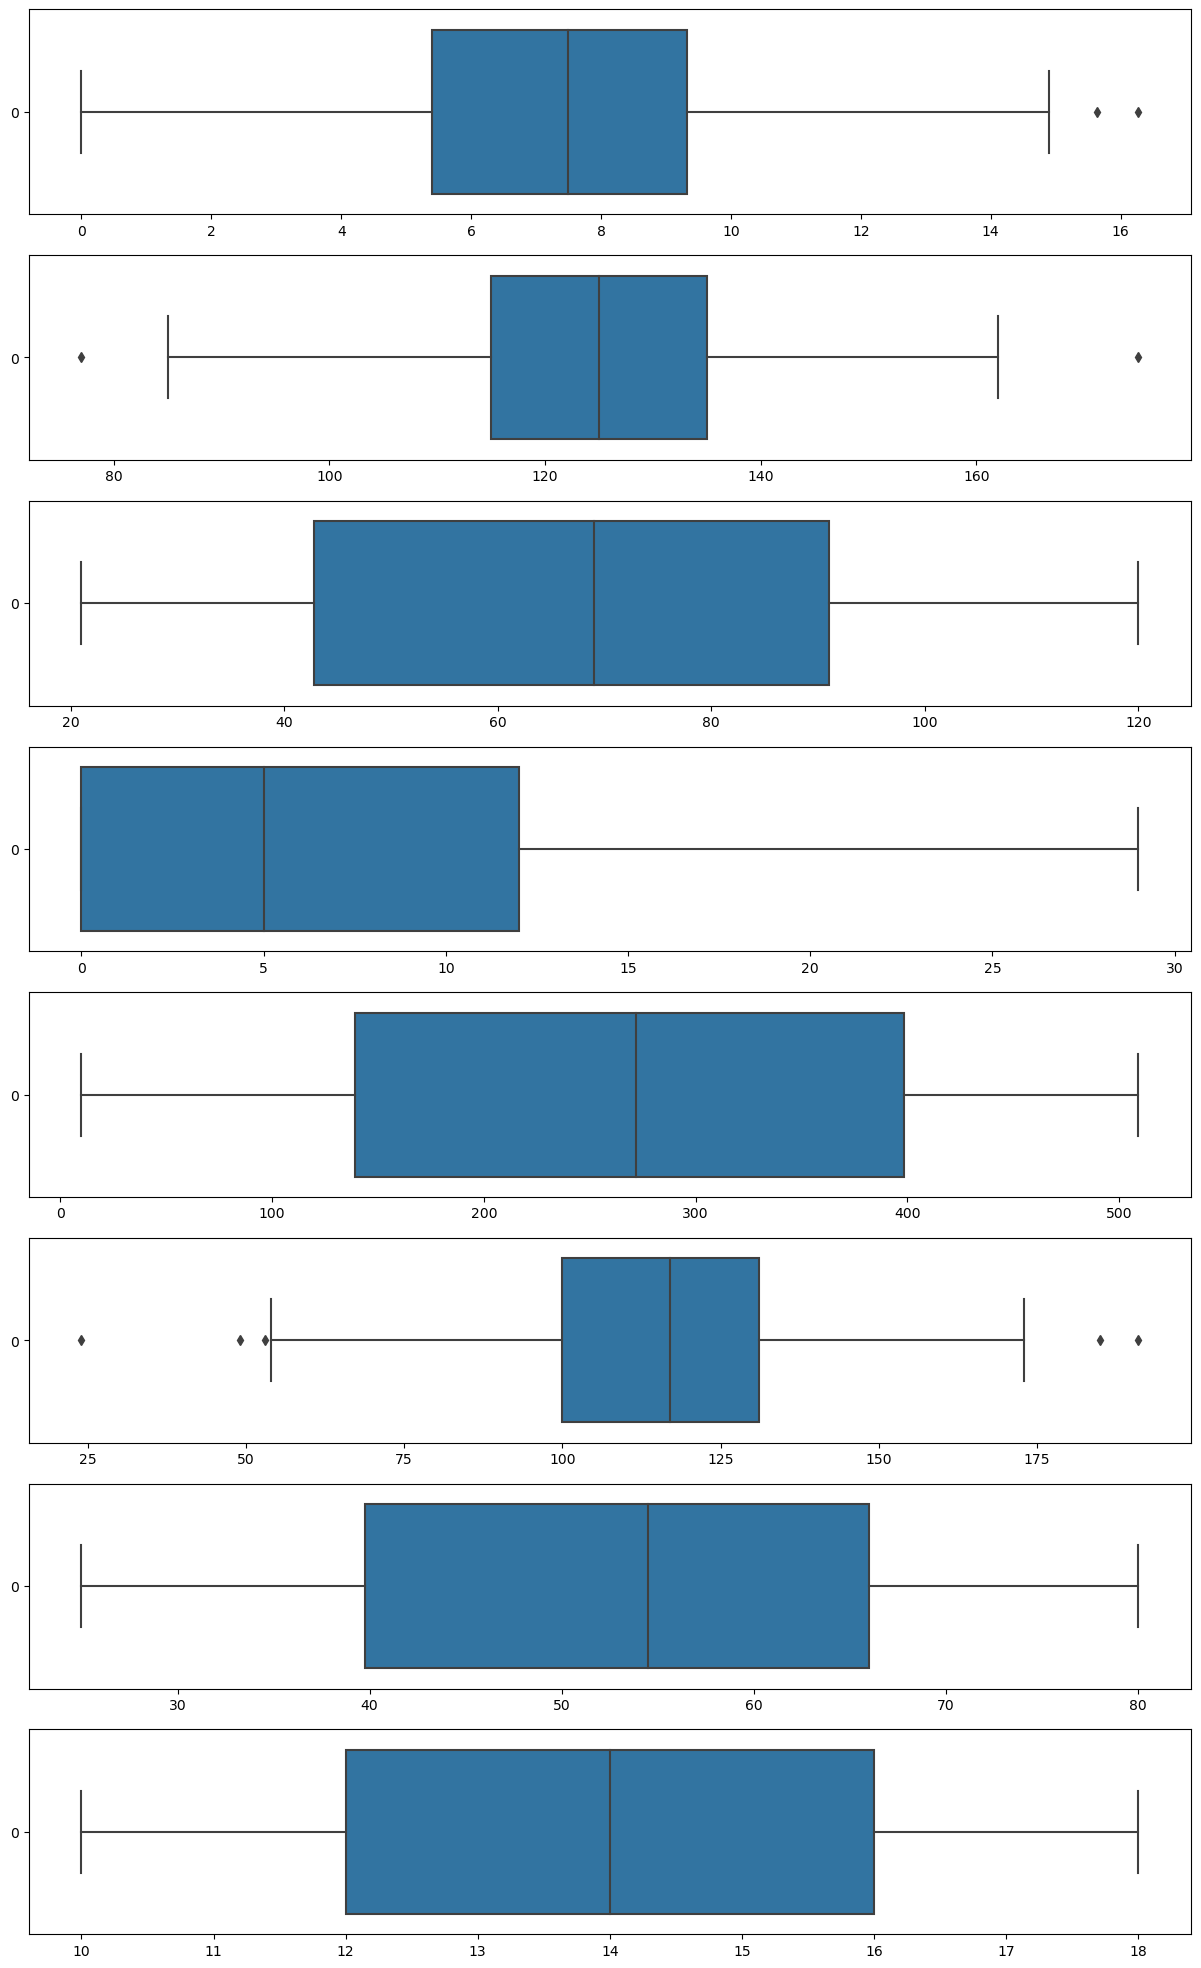

In [14]:
#Check for outliers
fig, ax =plt.subplots(8,1, figsize=(15,25)) 

sns.boxplot(company_data['Sales'] ,ax=ax[0],orient='h')
sns.boxplot(company_data['CompPrice'] ,ax=ax[1],orient='h')
sns.boxplot(company_data['Income'] ,ax=ax[2],orient='h')
sns.boxplot(company_data['Advertising'] ,ax=ax[3],orient='h')
sns.boxplot(company_data['Population'] ,ax=ax[4],orient='h')
sns.boxplot(company_data['Price'] ,ax=ax[5],orient='h')
sns.boxplot(company_data['Age'] ,ax=ax[6],orient='h')
sns.boxplot(company_data['Education'] ,ax=ax[7],orient='h')

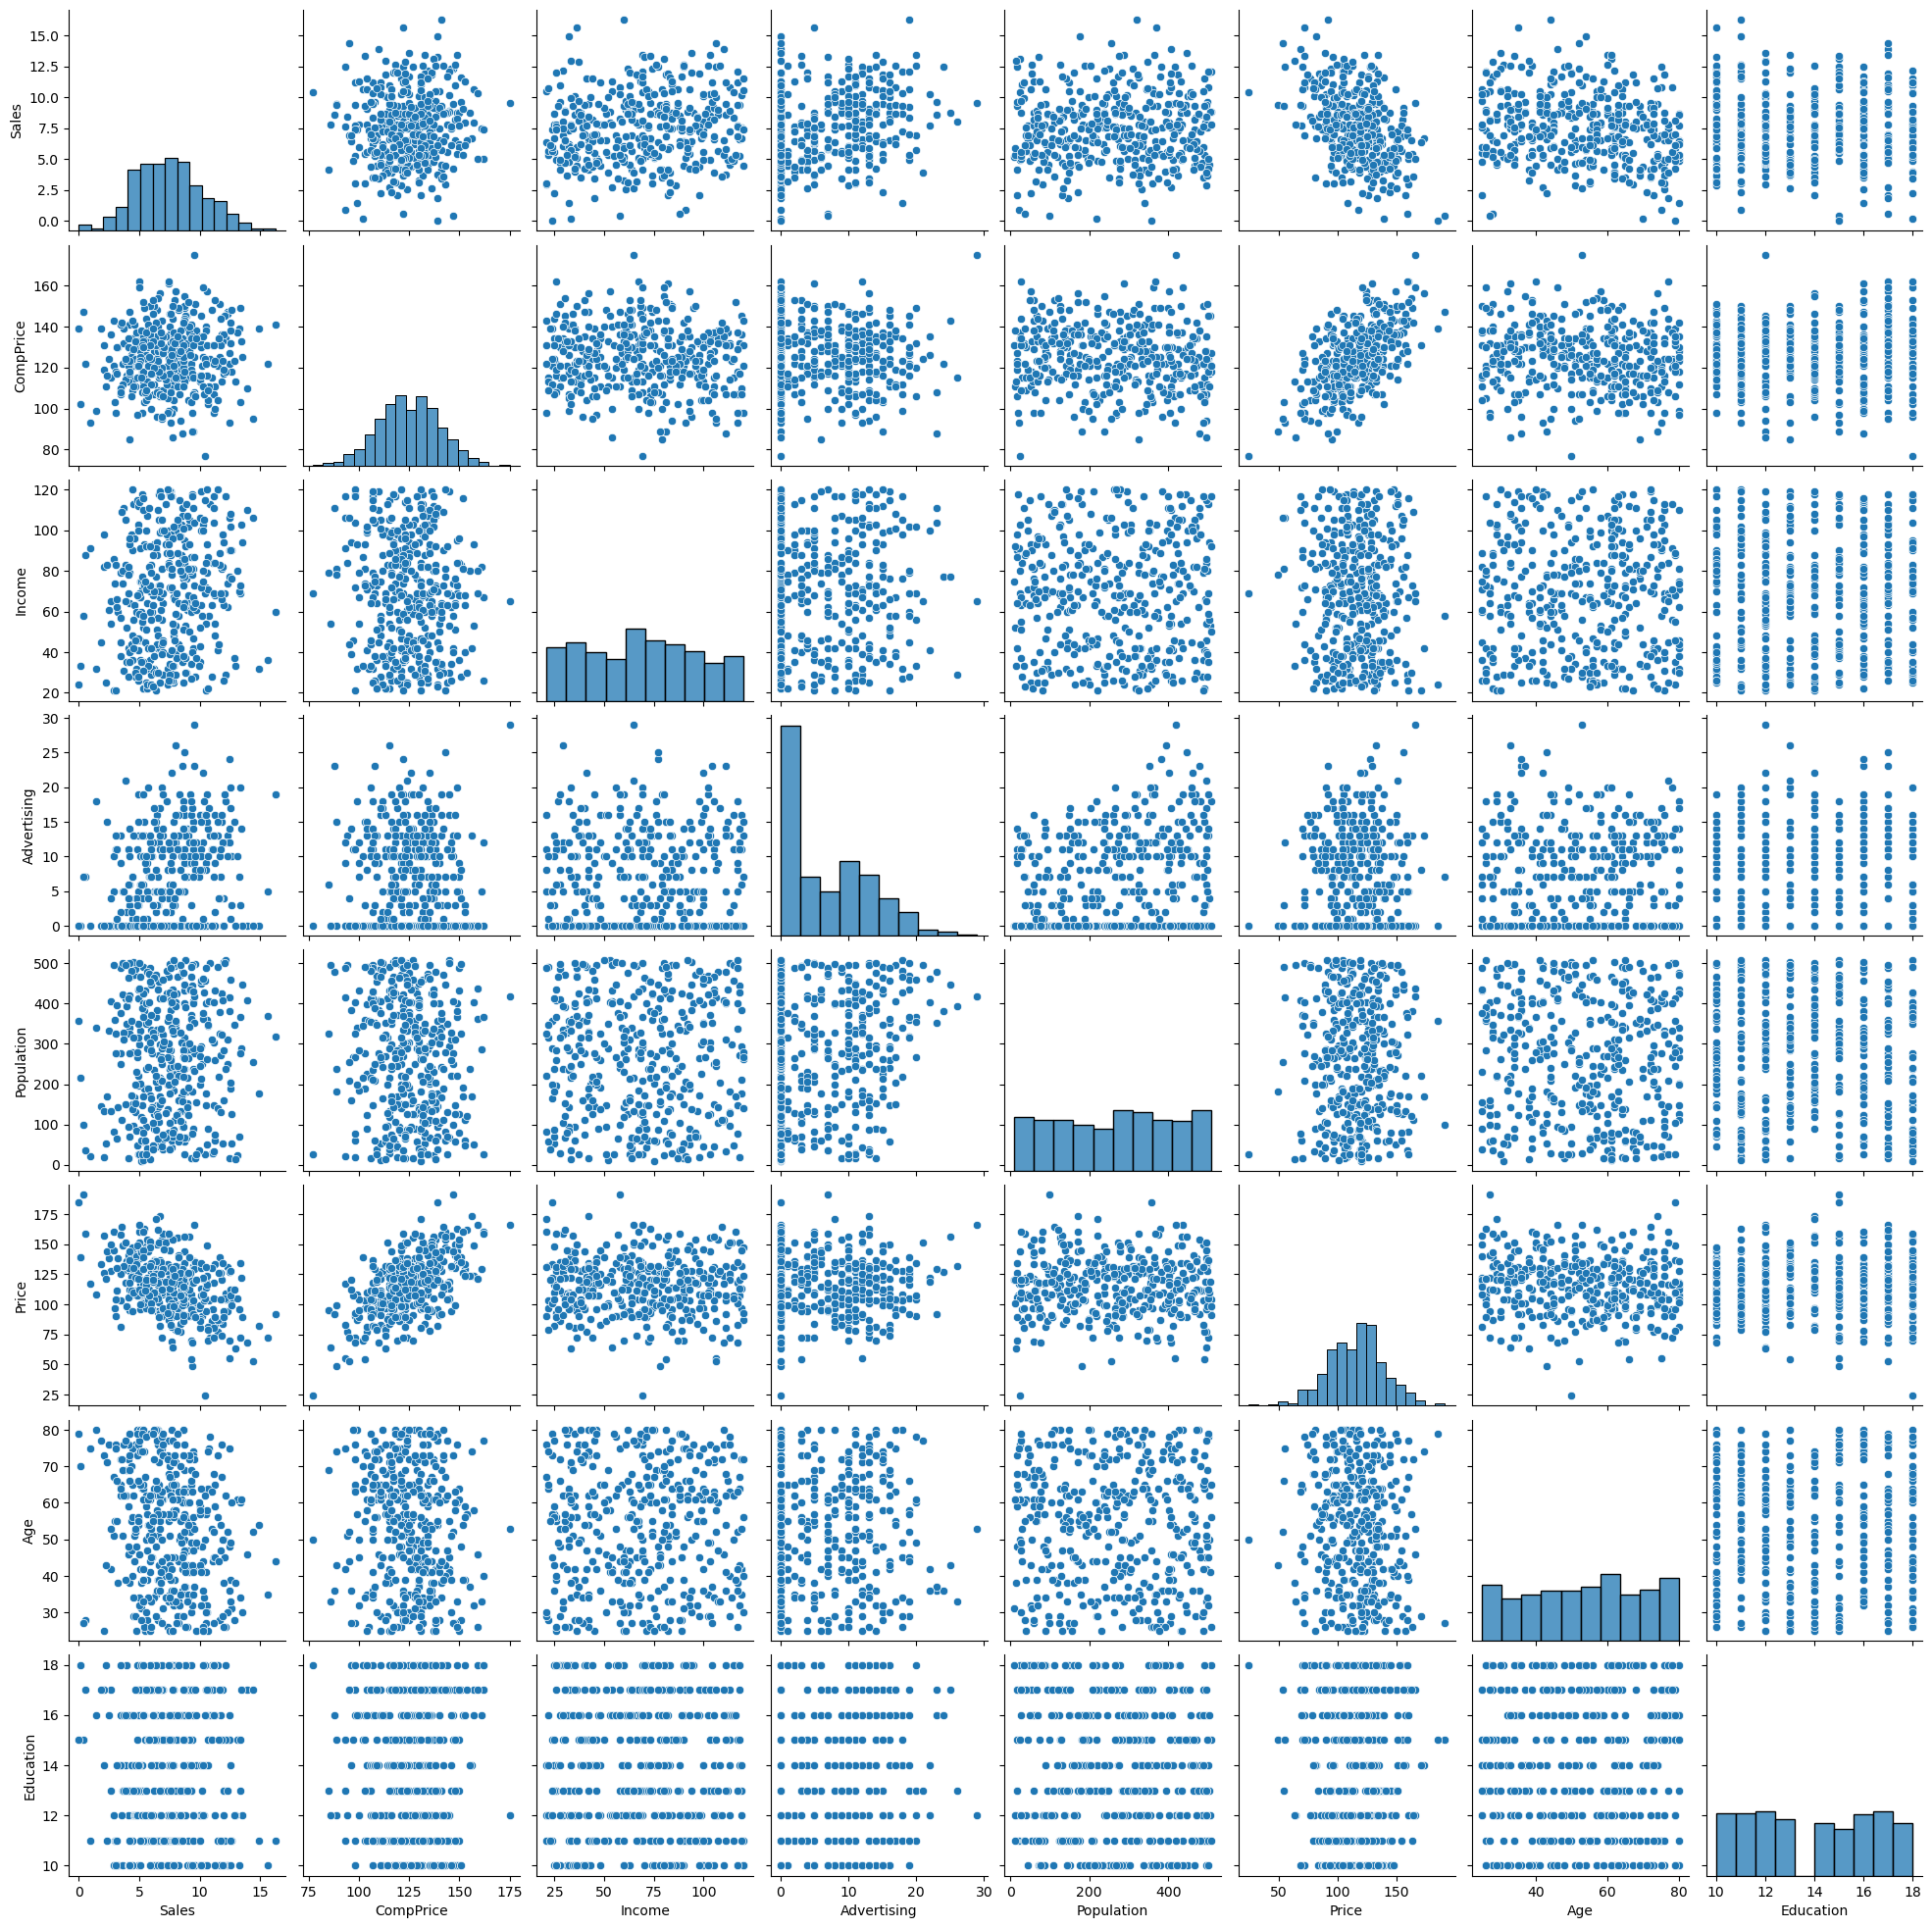

In [15]:
sns.pairplot(company_data)

In [16]:
company_data.corr()

Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   

                  Age  Education  
Sales       -0.231815  -0.051955  
CompPrice   -0.100239   0.025197  
Income      -0.004670  -0.056855  
Advertising -0.004557  -0.033594  
Population  -0.042663  -0.106378  
Price       -0.102177   0.011747  
Age          1.000000   0.006488  
Education    0.006488   1.000000

<AxesSubplot: >

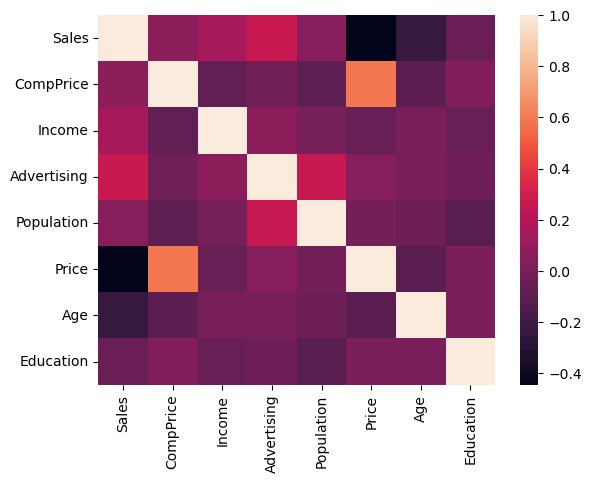

In [17]:
sns.heatmap(company_data.corr())

In [18]:
#Our target variable is sales so we need to convert it into category type first
converted_data = company_data.copy()
converted_data['Sales_category'] = pd.cut(x=converted_data['Sales'], bins = [0,7.50,17], labels=['Low','High'], right = False)
converted_data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_category  
0         17   Yes  Yes           High  
1         10   Yes  Yes           High  
2         12   Yes  Yes           High  
3         14   Yes  Yes            Low  
4         13   Yes   No            Low

<AxesSubplot: xlabel='Sales_category', ylabel='count'>

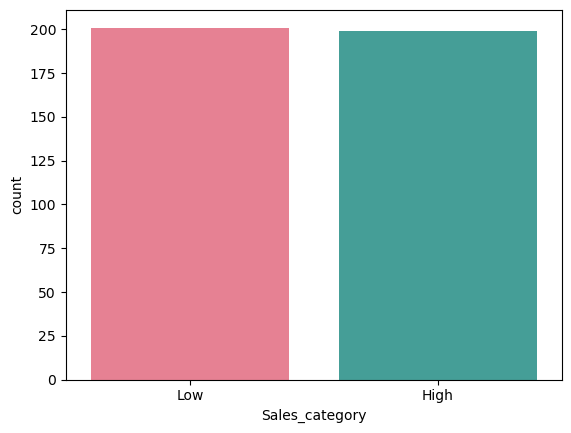

In [19]:
sns.countplot(x="Sales_category", data=converted_data,palette="husl")

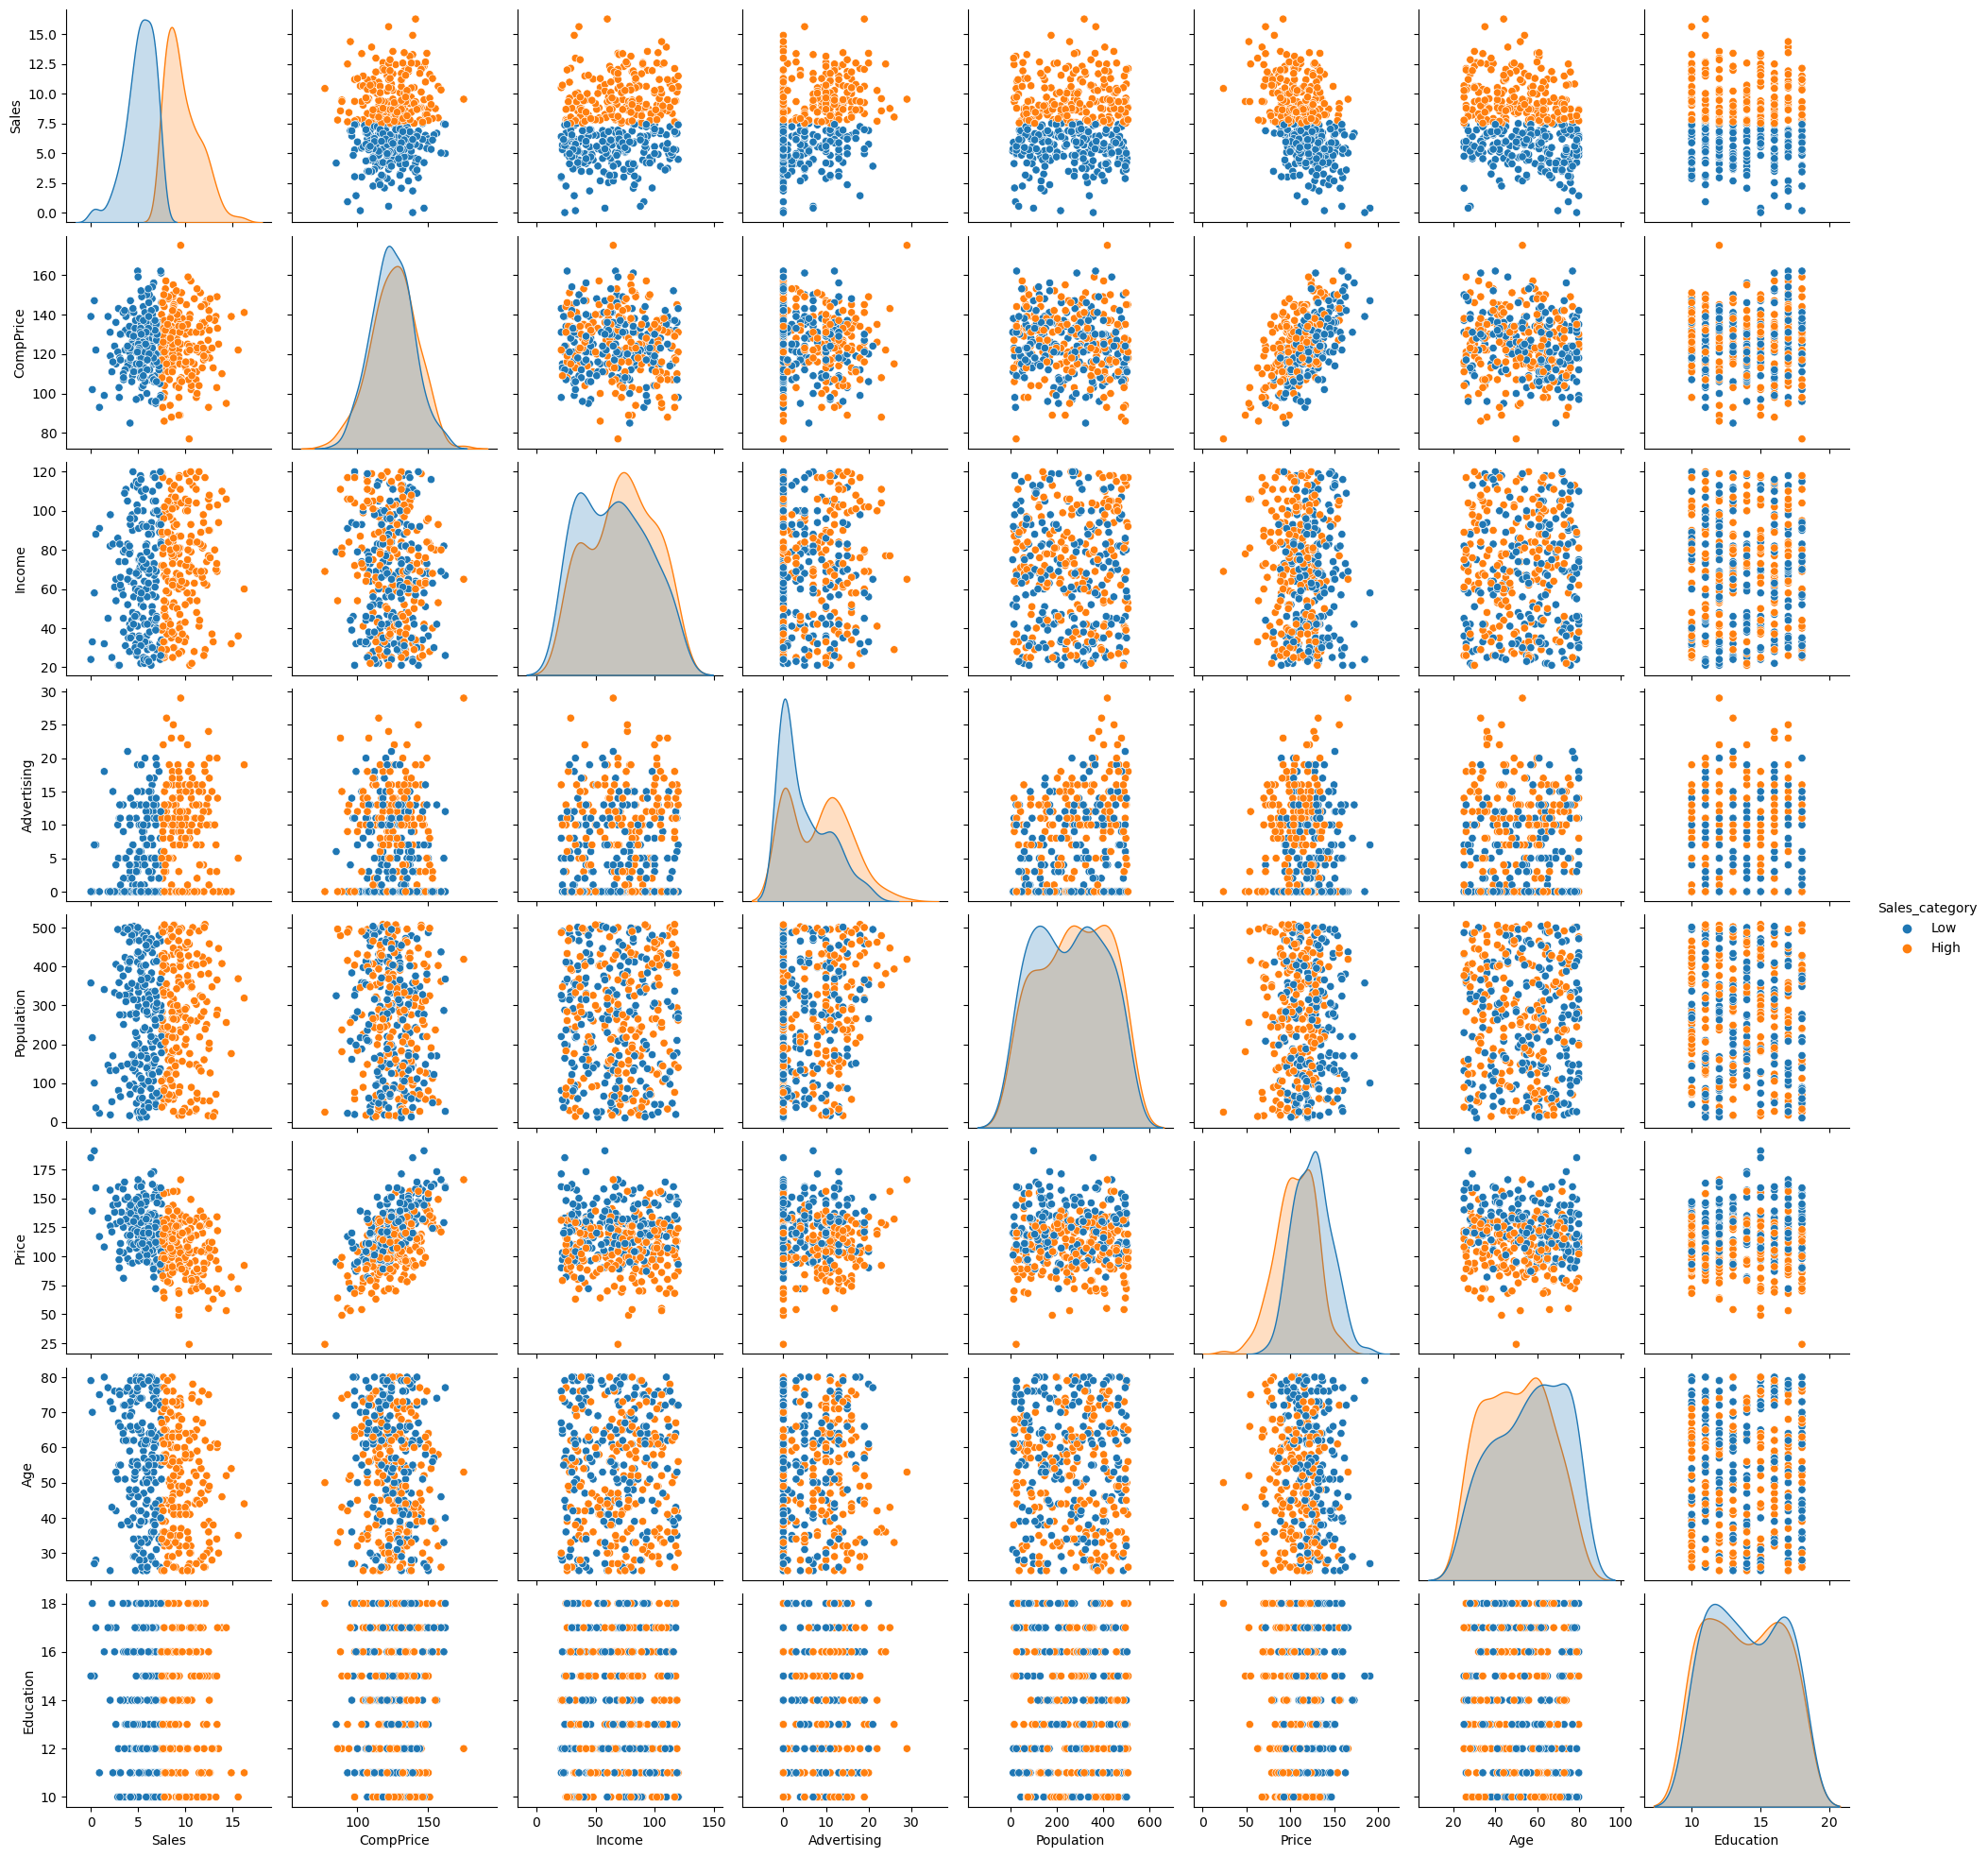

In [20]:
#relation with sales category with all other features
sns.pairplot(data=converted_data, hue = 'Sales_category')

In [21]:
#Dropping sales as we have the target as a Sales_category
#creating dummies for the categorical variables
df_1 = converted_data.drop('Sales',axis=1)
df_1 = pd.get_dummies(df_1.iloc[:,:-1])
df_1.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

In [22]:
#label encoder for Sales_category
df_1['Sales'] = converted_data['Sales_category']
encoder = LabelEncoder()
df_1['Sales'] = encoder.fit_transform(df_1['Sales'])
df_1.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  Sales  
0      0       1      0  
1      0       1      0  
2      0       1      0  
3      0       1      1  
4      1       0      1

In [46]:
#Data Splitting
X = df_1.drop('Sales',axis=1)
Y = df_1['Sales']

In [81]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [82]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(280, 14)
(120, 14)
(280,)


In [ ]:
#Decision Tree Model

In [83]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

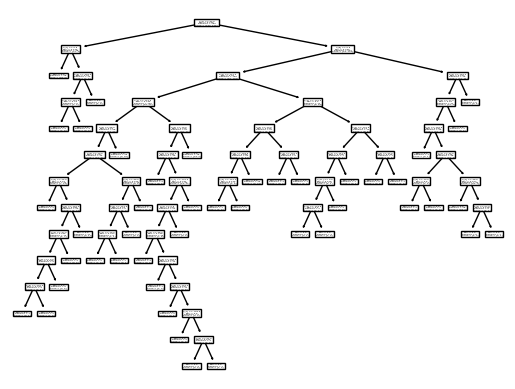

In [84]:
tree.plot_tree(model);

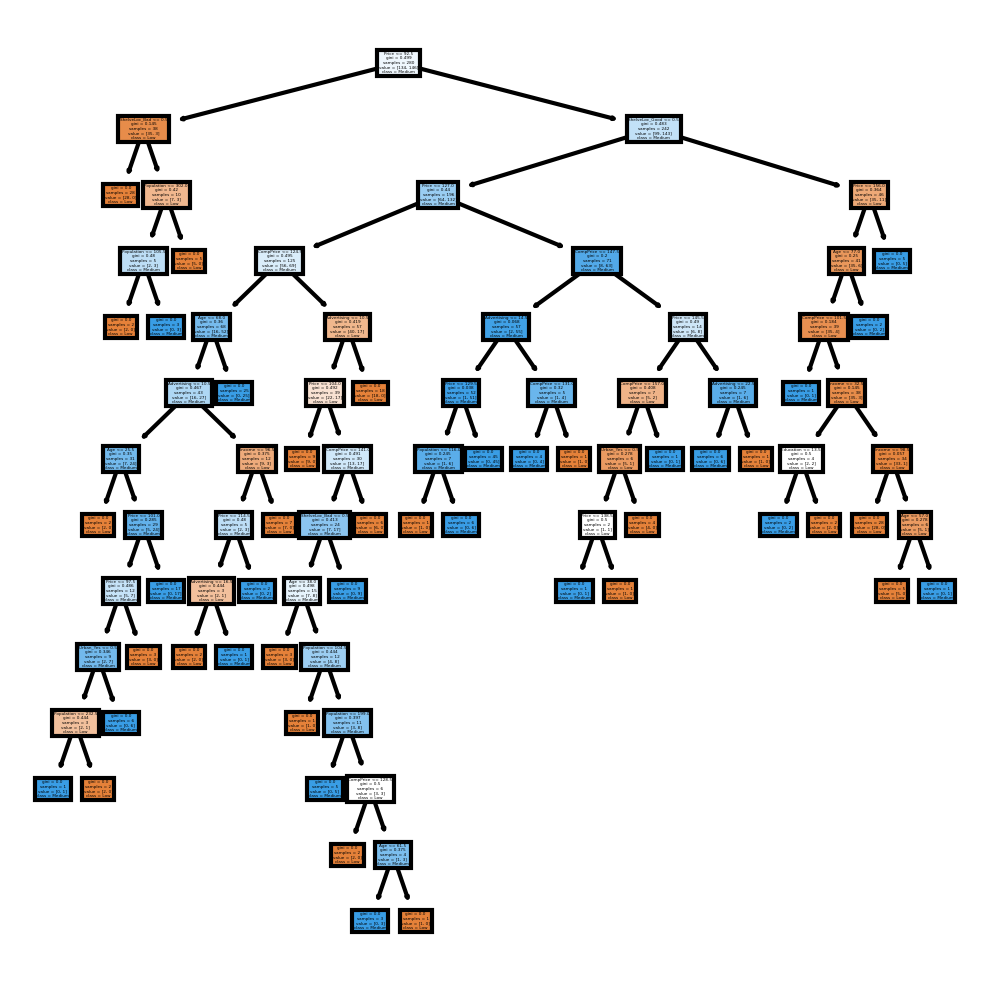

In [85]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled = True);

In [86]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [87]:
print(accuracy_score(Y_train,train_predictions))
print(accuracy_score(Y_test,test_predictions))

1.0
0.7333333333333333


In [ ]:
#tuning the model with hyper parameters

In [88]:
parameters = {'max_depth':[1,2,3,4,5],'min_samples_leaf':[1,2,3,4,5],'min_samples_split':[1,2,3,4,5],'criterion':['gini','entropy']}
scorer = make_scorer(accuracy_score)

In [89]:
grid_obj = GridSearchCV(model,parameters,scoring=scorer)

In [90]:
grid_fit = grid_obj.fit(X_train,Y_train)

In [91]:
best_model = grid_fit.best_estimator_
best_model

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

In [97]:
#creating model using entropy with max_depth=4, min_samples_leaf=5

In [92]:
model_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=5)
model_entropy.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)

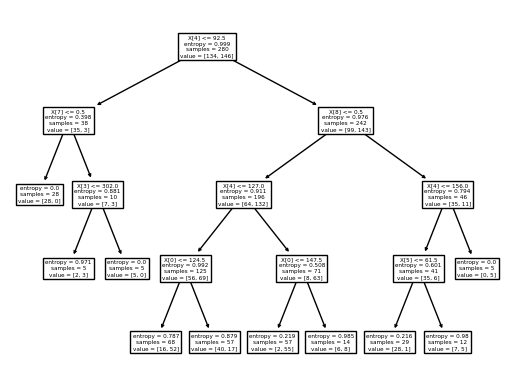

In [93]:
tree.plot_tree(model_entropy);

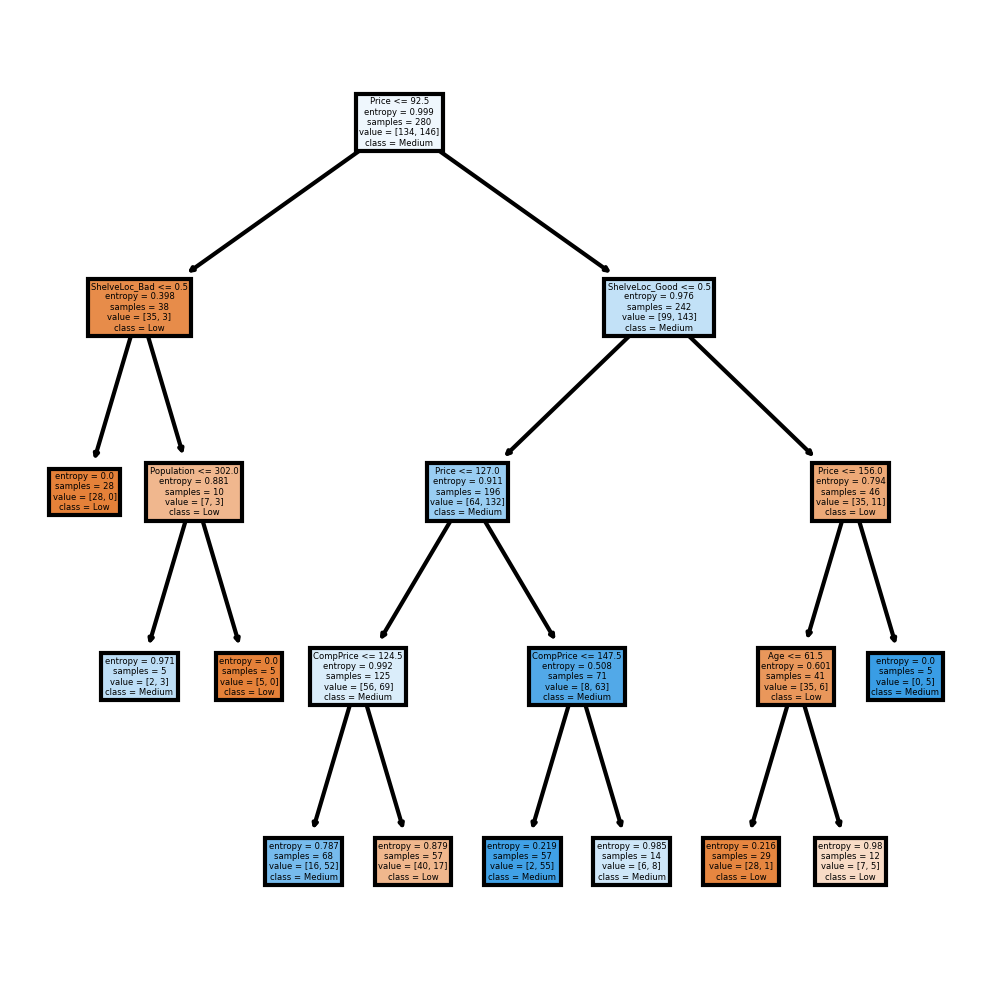

In [94]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_entropy,feature_names = fn,class_names=cn,filled = True);

In [95]:
train_predictions_entropy = model_entropy.predict(X_train)
test_predictions_entropy = model_entropy.predict(X_test)

In [96]:
print(accuracy_score(Y_train,train_predictions_entropy))
print(accuracy_score(Y_test,test_predictions_entropy))

0.825
0.7333333333333333


In [98]:
print(classification_report(Y_test,test_predictions_entropy))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        65
           1       0.70      0.73      0.71        55

    accuracy                           0.73       120
   macro avg       0.73      0.73      0.73       120
weighted avg       0.73      0.73      0.73       120



In [99]:
cmp_df = pd.DataFrame(Y_test)
cmp_df['Predicted Sales'] = test_predictions_entropy
cmp_df

Sales  Predicted Sales
209      1                0
280      1                1
33       0                0
210      1                0
93       0                0
..     ...              ...
60       0                1
79       0                1
285      0                1
305      0                1
281      0                0

[120 rows x 2 columns]

In [ ]:
#creating model using gini with max_depth=4, min_samples_split=5

In [100]:
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=5)
model_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

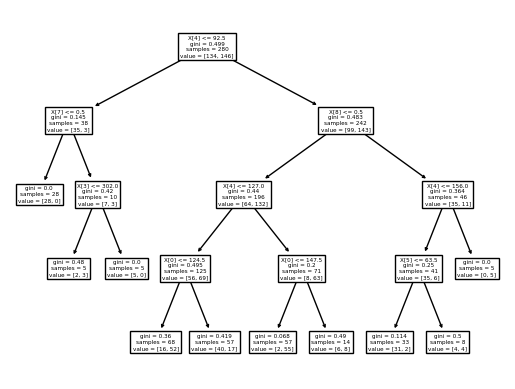

In [101]:
tree.plot_tree(model_gini);

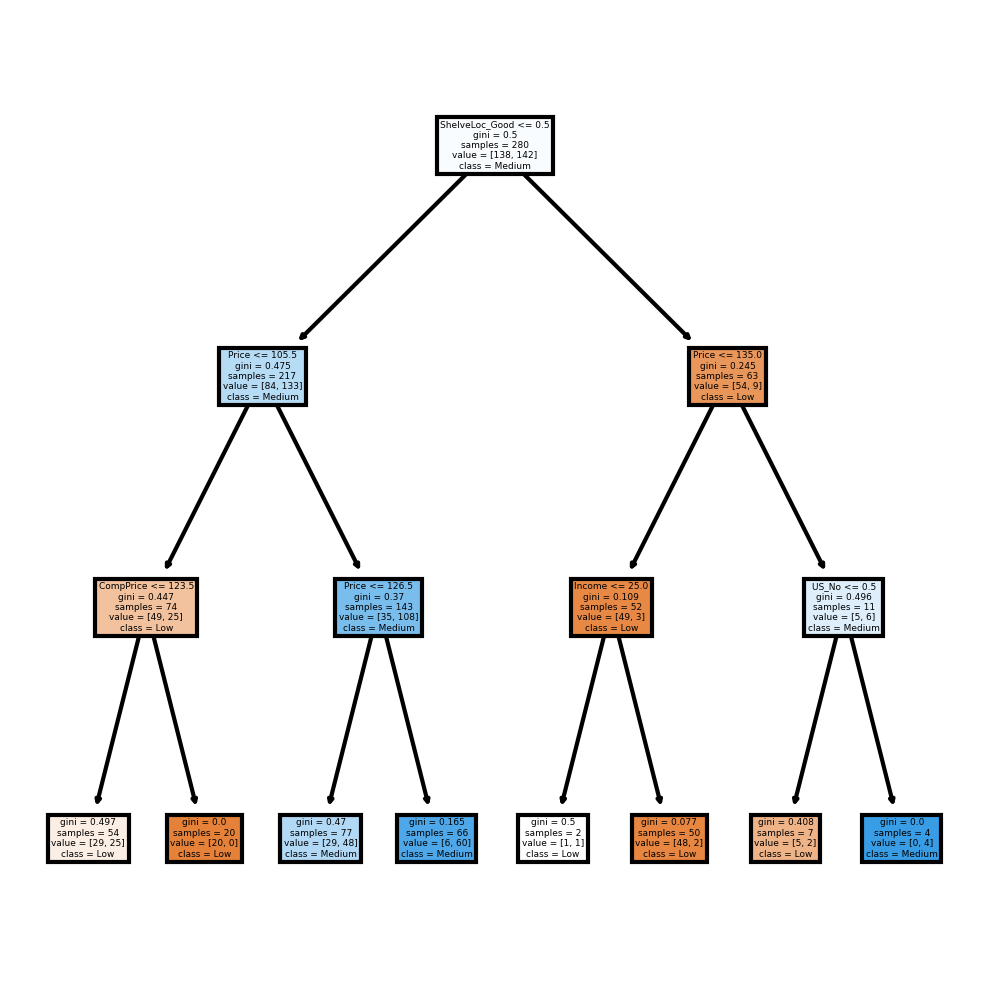

In [42]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,feature_names = fn,class_names=cn,filled = True);

In [105]:
train_predictions_gini = model_gini.predict(X_train)
test_predictions_gini = model_gini.predict(X_test)

In [106]:
print(accuracy_score(Y_train,train_predictions_gini))
print(accuracy_score(Y_test,test_predictions_gini))

0.825
0.7333333333333333


In [107]:
print(classification_report(Y_test,test_predictions_gini))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        65
           1       0.70      0.73      0.71        55

    accuracy                           0.73       120
   macro avg       0.73      0.73      0.73       120
weighted avg       0.73      0.73      0.73       120



In [111]:
cmp_df['Predicted Sales gini'] = test_predictions_gini
cmp_df

Sales  Predicted Sales  Predicted Sales gini
209      1                0                     0
280      1                1                     1
33       0                0                     0
210      1                0                     0
93       0                0                     0
..     ...              ...                   ...
60       0                1                     1
79       0                1                     1
285      0                1                     1
305      0                1                     1
281      0                0                     0

[120 rows x 3 columns]